In [23]:
%matplotlib inline
%mkdir figures
%load_ext autoreload
%autoreload 2
# GA champ - due to ability to retain good results and not be affected as much by random steps
import importlib
import mlrose
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
prob_name = "one_max"
np.random.seed(1)

mkdir: cannot create directory ‘figures’: File exists
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
one_max_length = 200
trials = 100

fitness = mlrose.OneMax()

# Generates many invalid inputs
state = np.random.randint(0, 100, (trials, one_max_length))
# Clock evaluation of the fitness to assess 'cost' of fitness function - for loop used because mlrose doesn't appropriately 
time_start = datetime.now()
for trial in range(trials):
    fitness.evaluate(state[trial])
print("Fitness eval time approximately: {}".format((datetime.now() - time_start)/trials))

Fitness eval time approximately: 0:00:00.000024


In [21]:
problem = mlrose.DiscreteOpt(length=one_max_length, fitness_fn=fitness, maximize=True, max_val=2) # Note values are count
# max_val is exclusive
# Also note minimizing since mlrose calculates number of attacking queens - we want this to be 0

In [22]:
# Wrapper for analysis, returns average time over trials and average best fitness
def algo_wrap(algo, trials=100, name="", verbose=False, **kwargs):
    if algo == None:
        raise Exception("Need an input algo")
    time_start = datetime.now()
    best_state, best_fitness  = zip(*[algo(problem, **kwargs) \
                                     for i in range(trials)])
    average_time = ((datetime.now() - time_start)/trials).microseconds
    average_best_fitness = sum(best_fitness) / trials
    if verbose:
        print("{} time approximately: {}".format(name, average_time))
        print("{} Example Best State: {}".format(name, best_state[0]))
        print("{} Average Best Fitness: {}".format(name, average_best_fitness))
    return average_time, average_best_fitness

# Wrapper for looping over hyperparams - returns dictionary of times/fitnesses per hyperparam - presume default hyperparams elsewhere
def eval_wrap(algo, default_params, hyperparams, verbose=False, trials=100):
    ret = {}
    for p in hyperparams:
        ret[p] = []
        input_params = default_params
        ret[p].append(np.empty_like(hyperparams[p])) # time
        ret[p].append(np.empty_like(hyperparams[p])) # fitness
        for i, setting in enumerate(hyperparams[p]):
            print(setting, p)
            input_params[p] = setting
            ret[p][0][i], ret[p][1][i] = algo_wrap(algo, verbose=verbose, trials=trials, **input_params)
    return ret

# Save figures, then plot them - names required for bar graphs
def plot_all(problem_name, algo_name, hyperparams, names, stats):
    for i, param in enumerate(stats):
        plt.clf()
        plt.xlabel(param)
        plt.ylabel(u'Time (\u03bcs)')
        if param in names: # check if we provided custom names (probably bar) type of example hyperparam bar graph
            ind = np.arange(len(hyperparams[param]))
            plt.xticks(ind, names[param])
            plt.bar(ind, stats[param][0])
        else:
            plt.plot(hyperparams[param], stats[param][0])
        plt.title("{} {} Time v {}".format(problem_name, algo_name, param))
        plt.savefig("figures/{}_{}_{}_time.png".format(problem_name, algo_name, param))
        plt.clf()
        if param in names: # check type of example hyperparam bar graph
            ind = np.arange(len(hyperparams[param]))
            plt.xticks(ind, names[param])
            plt.bar(ind, stats[param][1])
        else:
            plt.plot(hyperparams[param], stats[param][1])
        plt.xlabel(param)
        plt.ylabel("Fitness")
        plt.title("{} {} Fitness v {}".format(problem_name, algo_name, param))
        plt.savefig("figures/{}_{}_{}_fitness.png".format(problem_name, algo_name, param))
    # Now for the sake of the notebook, plot in subplots
    plt.clf()
    fig, axes = plt.subplots(len(stats.keys()), 2, figsize=(12,8))
    plt.tight_layout(h_pad=5, w_pad=2)
    fig.suptitle("{} {}".format(problem_name, algo_name))
    fig.subplots_adjust(top=0.88)
    for i, param in enumerate(stats):
        axes[i,0].set_xlabel(param)
        axes[i,1].set_xlabel(param)
        axes[i,0].set_ylabel(u'Time (\u03bcs)')
        axes[i,1].set_ylabel('Fitness')
        axes[i,0].set_title("Time v {}".format(param))
        axes[i,1].set_title("Fitness v {}".format(param))
        if param in names: # check type of example hyperparam bar graph
            ind = np.arange(len(hyperparams[param]))
            axes[i,0].bar(ind, stats[param][0])
            # No labels here, this is too annoying
        else:
            axes[i,0].plot(hyperparams[param], stats[param][0])
        if param in names: # check type of example hyperparam bar graph
            ind = np.arange(len(hyperparams[param]))
            axes[i,1].bar(ind, stats[param][1])
        else:
            axes[i,1].plot(hyperparams[param], stats[param][1])

In [24]:
# Randomized Hill Climbing
max_attempt_range = range(3,33, 3)
max_iter_range = range(20, 1020, 40)
restarts = range(0, 5, 1) # we expect no change because there are no local maxima
default_params = {'max_attempts': 10, 'max_iters': 1000}
hyperparams = {'max_attempts': max_attempt_range, 'max_iters': max_iter_range, 'restarts': restarts}

In [25]:
load_rhc = False
algo_name = "rhc"
fn = '{}_{}_stats.pickle'.format(prob_name, algo_name)

rhc_ret = None
if load_rhc:
    with open(fn) as f:
        rhc_ret = pickle.load(f)
else: 
    rhc_ret = eval_wrap(mlrose.random_hill_climb, default_params, hyperparams, trials=10)
    with open('{}_{}_stats.pickle'.format(prob_name, algo_name), 'wb') as handle:
        pickle.dump(rhc_ret, handle)

20 max_iters
60 max_iters
100 max_iters
140 max_iters
180 max_iters
220 max_iters
260 max_iters
300 max_iters
340 max_iters
380 max_iters
420 max_iters
460 max_iters
500 max_iters
540 max_iters
580 max_iters
620 max_iters
660 max_iters
700 max_iters
740 max_iters
780 max_iters
820 max_iters
860 max_iters
900 max_iters
940 max_iters
980 max_iters
3 max_attempts
6 max_attempts
9 max_attempts
12 max_attempts
15 max_attempts
18 max_attempts
21 max_attempts
24 max_attempts
27 max_attempts
30 max_attempts
0 restarts
1 restarts
2 restarts
3 restarts
4 restarts


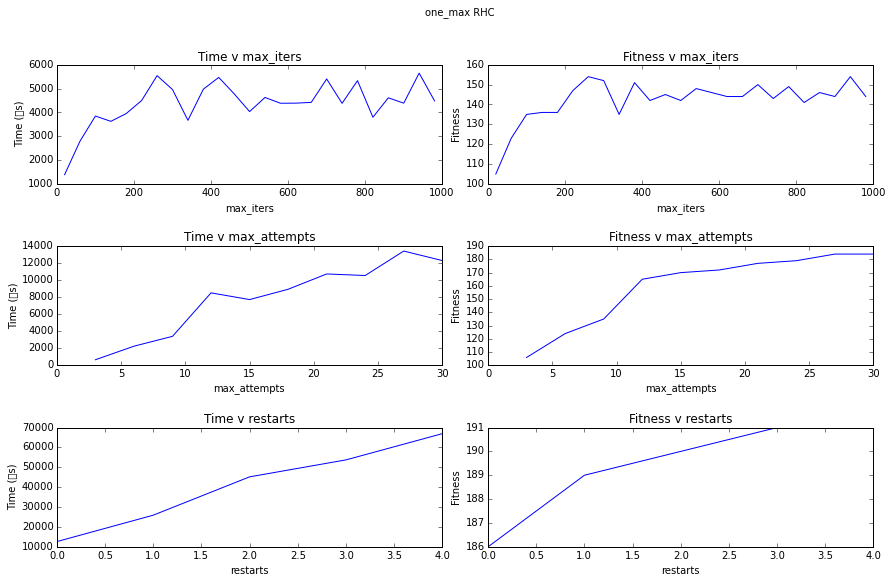

In [26]:
plot_all(prob_name, "RHC", hyperparams, {}, rhc_ret)

In [27]:
# Simulated Annealing
schedules = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
names = {"schedule": ["exp", "geom", "arith"]}
max_attempt_range = range(3,33, 3)
max_iter_range = range(20, 1020, 40)
default_params = {'max_attempts': 10, 'max_iters': 1000, 'schedule': schedules[1]}
hyperparams = {'max_attempts': max_attempt_range, 'max_iters': max_iter_range, 'schedule': schedules}

In [28]:
load_sa = False
algo_name = "sa"
fn = '{}_{}_stats.pickle'.format(prob_name, algo_name)

sa_ret = None
if load_sa:
    with open(fn) as f:
        sa_ret = pickle.load(f)
else: 
    sa_ret = eval_wrap(mlrose.simulated_annealing, default_params, hyperparams)    
    with open('{}_{}_stats.pickle'.format(prob_name, algo_name), 'wb') as handle:
        pickle.dump(sa_ret, handle)

20 max_iters
60 max_iters
100 max_iters
140 max_iters
180 max_iters
220 max_iters
260 max_iters
300 max_iters
340 max_iters
380 max_iters
420 max_iters
460 max_iters
500 max_iters
540 max_iters
580 max_iters
620 max_iters
660 max_iters
700 max_iters
740 max_iters
780 max_iters
820 max_iters
860 max_iters
900 max_iters
940 max_iters
980 max_iters
<mlrose.decay.ExpDecay object at 0x7ff055759f28> schedule
<mlrose.decay.GeomDecay object at 0x7ff055759fd0> schedule
<mlrose.decay.ArithDecay object at 0x7ff055759940> schedule
3 max_attempts
6 max_attempts
9 max_attempts
12 max_attempts
15 max_attempts
18 max_attempts
21 max_attempts
24 max_attempts
27 max_attempts
30 max_attempts


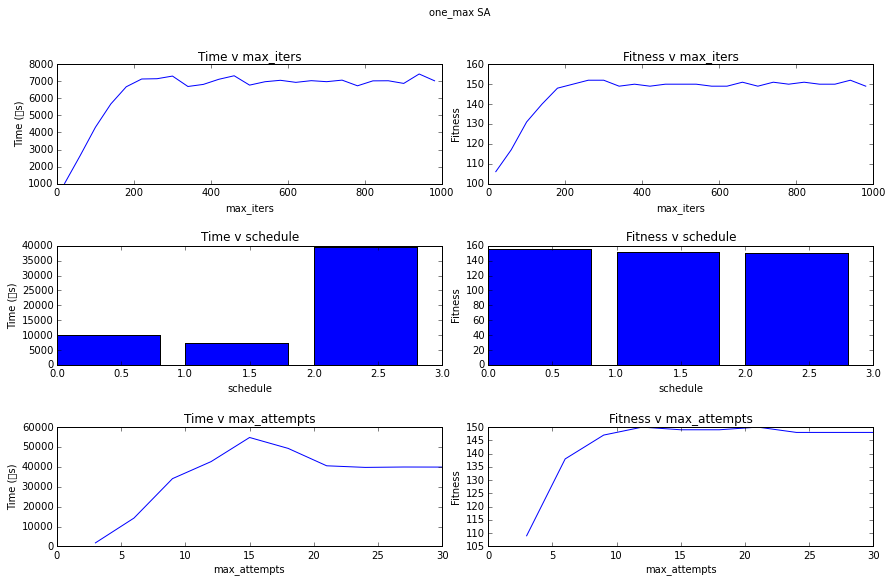

In [29]:
plot_all(prob_name, "SA", hyperparams, names, sa_ret)

In [30]:
from deap import base, creator, tools, algorithms
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [37]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=one_max_length)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [38]:
def evaluate(state): # Pulled from mlrose
    return sum(state),

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

# plot_all("one_max", "GA", hyperparams, names, ga_ret)

In [39]:
pop = toolbox.population(n=100)
# hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, verbose=False)
avg_, max_ = logbook.select("avg", "max")
print(avg_[-1], max_[-1])

176.26 180.0


In [40]:
# Yep, we're still copy-pasting
# Wrapper for analysis, returns average time over trials and average best fitness
# Not super generic, we're still getting two stats
def algo_wrap_generic(algo, stats_fn, trials=100, name="", **kwargs):
    if algo == None:
        raise Exception("Need an input algo")
    time_start = datetime.now()
    avg_, max_  = zip(*[stats_fn(algo(**kwargs)) \
                                     for i in range(trials)])
    avg_avg = sum(avg_) / trials
    avg_max = sum(max_) / trials
    return avg_avg, avg_max

# Wrapper for looping over hyperparams - returns dictionary of times/fitnesses per hyperparam - presume default hyperparams elsewhere
def eval_wrap_generic(algo, stats_fn, default_params, hyperparams, verbose=False, trials=100):
    ret = {}
    for p in hyperparams:
        ret[p] = []
        input_params = default_params
        ret[p].append(np.empty_like(hyperparams[p])) 
        ret[p].append(np.empty_like(hyperparams[p]))
        for i, setting in enumerate(hyperparams[p]):
            print(setting, p)
            input_params[p] = setting
            ret[p][0][i], ret[p][1][i] = algo_wrap_generic(algo, stats_fn, trials=trials, **input_params)
    return ret

# Save figures, then plot them - names required for bar graphs
def plot_genetic(problem_name, algo_name, hyperparams, names, stats):
    for i, param in enumerate(stats):
        plt.clf()
        plt.xlabel(param)
        plt.ylabel('')
        plt.plot(hyperparams[param], stats[param][0], linestyle='--', color='cornflowerblue', label='average')
        plt.plot(hyperparams[param], stats[param][1], linestyle='-', color='cornflowerblue', label='best')
        plt.legend()
        plt.title("{} {} Fitness v {}".format(problem_name, algo_name, param))
        plt.savefig("figures/{}_{}_{}_time.png".format(problem_name, algo_name, param))
        plt.clf()
    # Now for the sake of the notebook, plot in subplots
    plt.clf()
    fig, axes = plt.subplots(len(stats.keys()), figsize=(12,8))
    plt.tight_layout(h_pad=5)
    fig.suptitle("{} {}".format(problem_name, algo_name))
    fig.subplots_adjust(top=0.88)
    for i, param in enumerate(stats):
        axes[i].set_xlabel(param)
        axes[i].set_ylabel('Fitness')
        axes[i].set_title("Fitness v {}".format(param))
        axes[i].plot(hyperparams[param], stats[param][0], linestyle='--', color='cornflowerblue', label='average')
        axes[i].plot(hyperparams[param], stats[param][1], linestyle='-', color='cornflowerblue', label='best')

In [41]:
# Genetic Algorithms - the mlrose implementation is not sufficiently sophisticated to yield meaningful results
mutation_rates = np.arange(0, .99, .05)
gen_range = range(3, 153, 3)
population_range = range(25, 525, 25)
default_params = {'pop_size': 100, 'mutpb': 0.2, 'ngen': 100, 'cxpb': 0.5, 'verbose': False, 'stats': stats}
hyperparams = {'pop_size': population_range, 'mutpb': mutation_rates, 'ngen': gen_range}

In [42]:
def ea_wrap(**kwargs):
    pop = toolbox.population(n=kwargs["pop_size"])
    del kwargs["pop_size"]
    return algorithms.eaSimple(pop, toolbox, **kwargs)

load_ga = False
algo_name = "ga"
def ga_stats(ea_ret):
    pop, logbook = ea_ret
    avg_, max_ = logbook.select("avg", "max")
    return avg_[-1], max_[-1]

fn = '{}_{}_stats.pickle'.format(prob_name, algo_name)
ga_ret = None
if load_ga:
    with open(fn) as f:
        ga_ret = pickle.load(f)
else: 
    ga_ret = eval_wrap_generic(ea_wrap, ga_stats, default_params, hyperparams, trials=1)    
    with open('{}_{}_stats.pickle'.format(prob_name, algo_name), 'wb') as handle:
        pickle.dump(ga_ret, handle)


25 pop_size
50 pop_size
75 pop_size
100 pop_size
125 pop_size
150 pop_size
175 pop_size
200 pop_size
225 pop_size
250 pop_size
275 pop_size
300 pop_size
325 pop_size
350 pop_size
375 pop_size
400 pop_size
425 pop_size
450 pop_size
475 pop_size
500 pop_size
0.0 mutpb
0.05 mutpb
0.1 mutpb
0.15000000000000002 mutpb
0.2 mutpb
0.25 mutpb
0.30000000000000004 mutpb
0.35000000000000003 mutpb
0.4 mutpb
0.45 mutpb
0.5 mutpb
0.55 mutpb
0.6000000000000001 mutpb
0.65 mutpb
0.7000000000000001 mutpb
0.75 mutpb
0.8 mutpb
0.8500000000000001 mutpb
0.9 mutpb
0.9500000000000001 mutpb
3 ngen
6 ngen
9 ngen
12 ngen
15 ngen
18 ngen
21 ngen
24 ngen
27 ngen
30 ngen
33 ngen
36 ngen
39 ngen
42 ngen
45 ngen
48 ngen
51 ngen
54 ngen
57 ngen
60 ngen
63 ngen
66 ngen
69 ngen
72 ngen
75 ngen
78 ngen
81 ngen
84 ngen
87 ngen
90 ngen
93 ngen
96 ngen
99 ngen
102 ngen
105 ngen
108 ngen
111 ngen
114 ngen
117 ngen
120 ngen
123 ngen
126 ngen
129 ngen
132 ngen
135 ngen
138 ngen
141 ngen
144 ngen
147 ngen
150 ngen


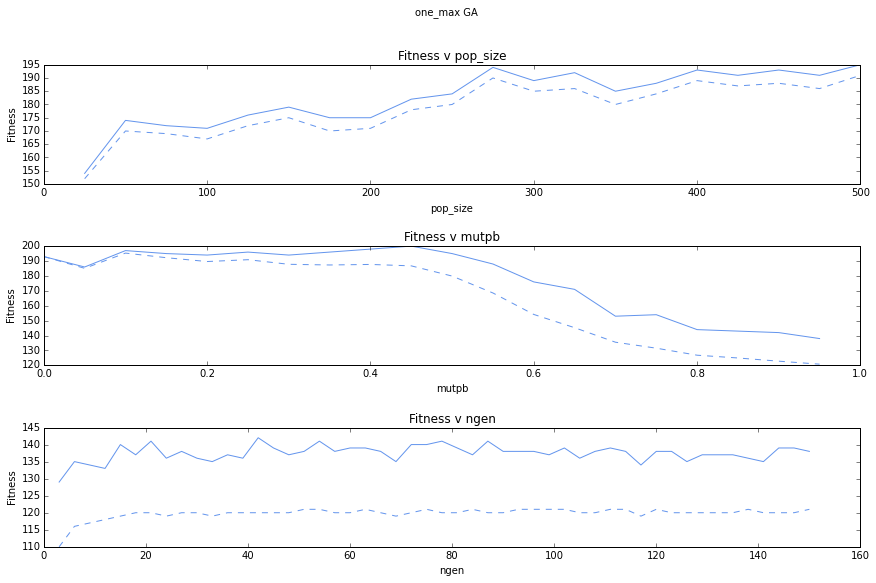

In [43]:
plot_genetic(prob_name, "GA", hyperparams, {}, ga_ret)

In [45]:
# MIMIC - this is very slow...
population_range = range(25, 125, 25)
keep_pct_range = np.arange(0.1, .91, .1)
max_attempt_range = range(3, 25, 3)
max_iter_range = range(20, 180, 20)
default_params = {'pop_size': 100, 'max_attempts': 5, 'keep_pct': 0.2, 'max_iters': 100}
hyperparams = {'pop_size': population_range, 'max_attempts': max_attempt_range, 'keep_pct': keep_pct_range, 'max_iters': max_iter_range}

In [46]:
load_mimic = False
algo_name = "mimic"

fn = '{}_{}_stats.pickle'.format(prob_name, algo_name)
mimic_ret = None
if load_mimic:
    with open(fn, 'rb') as f:
        mimic_ret = pickle.load(f)
else: 
    mimic_ret = eval_wrap(mlrose.mimic, default_params, hyperparams, trials=1)    
    with open('{}_{}_stats.pickle'.format(prob_name, algo_name), 'wb') as handle:
        pickle.dump(mimic_ret, handle)

25 pop_size
50 pop_size
75 pop_size
100 pop_size
20 max_iters
40 max_iters
60 max_iters
80 max_iters
100 max_iters
120 max_iters
140 max_iters
160 max_iters
3 max_attempts
6 max_attempts
9 max_attempts
12 max_attempts
15 max_attempts
18 max_attempts
21 max_attempts
24 max_attempts
0.1 keep_pct
0.2 keep_pct
0.30000000000000004 keep_pct


KeyboardInterrupt: 

In [ ]:
plot_all(prob_name, "MIMIC", hyperparams, {}, mimic_ret)